In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")


path = '/home/andres/Escritorio/OrgaDeDatos'
df= pd.read_csv(path + '/train.csv')
#Fuente: https://es.investing.com/currencies/usd-mxn-historical-data
#AGREGAR EL PATH CORRESPONDIENTE
path1 = '/home/andres/Escritorio/OrgaDeDatos'
dolar= pd.read_csv(path1 + '/Datos históricos USD_MXN.csv')
dolar.columns = ["fecha", "last", "opening", "max", "min", "std"]
dolar.drop(["std", "opening", "opening", "max", "min"], axis=1 ,inplace=True)
#Paso a formato fecha correctamente y luego creo columnas mes y año
dolar['date'] = pd.to_datetime(dolar['fecha'], format="%b %Y")
dolar.drop(["fecha"], axis=1, inplace=True)
dolar.columns= ['price', "date"]
#El csv ponia los numeros con punto en vez de coma.
dolar['price'] = dolar['price'].replace(',', '.', regex=True).astype(float)
dolar["year"] = dolar.date.dt.year
dolar['month'] = dolar.date.dt.month
dolar.drop(["date"], axis=1, inplace=True)
df['fecha'] = pd.to_datetime(df['fecha'])
df['year'] = df['fecha'].dt.year
df['month']= df['fecha'].dt.month
#Agrego la columna precio en dolar por propiedad, en el dataframe original
newDf= pd.merge(df, dolar, on=['year', 'month'], how='left')
newDf["dollar_price"] = newDf.apply(lambda row: row["precio"]/row["price"], axis=1)
#Filtro dejando las cosas útiles.
#Para agregar una columna, se debe agregar aca y luego agregarla al merge
df = newDf.filter(["id", "tipodepropiedad", "habitaciones",'garages', 'banos', 'ciudad',
                   'provincia','metroscubiertos', 'metrostotales', 'idzona', 'fecha',
                   'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
                   'centroscomercialescercanos','precio', 'dollar_price' ])
def asignarMetros(metroscubiertos, metrostotales):
    if (metroscubiertos != 0 and metrostotales == 0):
        return metroscubiertos
    else:
        return metrostotales
    
#Arreglando, no pueden haber propiedades con metros cubiertos pero sin metros totales
df['metrostotales'].fillna(0, inplace=True)
df['metrostotales'] = df.apply(lambda x: asignarMetros(x['metroscubiertos'],x['metrostotales']),axis=1)
df.head()
#Filtrando el garage, lotes, hospedaje, otros
filtroTerreno = df["tipodepropiedad"].isin(["Huerta","Edificio" ,"Nave industrial", "Terreno", "Terreno comercial", 
                                            "Bodega comercial", "Terreno industrial"])
dfTerreno = df[filtroTerreno]
dfTerreno.tipodepropiedad.value_counts()
#Dropeo todos los terrenos que tienen habitaciones ya que si las tienen no serian terrenos.
dfTerreno = dfTerreno[dfTerreno["habitaciones"].isna()]
dfTerreno.tipodepropiedad.value_counts()
#Limpiando las propiedades tipo casa, no pueden no tener al menos una habitacion o baño y no pueden
#tener metros no cubiertos
filtro1 = df["tipodepropiedad"].isin(["Apartamento", "Casa", "Casa en condominio",
                                        "Casa uso de suelo", "Rancho", "Quinta Vacacional"])
dfCasas = df[filtro1]
dfCasas = dfCasas[np.isfinite(dfCasas['habitaciones'])]
dfCasas = dfCasas[np.isfinite(dfCasas['banos'])]
dfCasas = dfCasas[np.isfinite(dfCasas['metroscubiertos'])]
dfCasas.garages.fillna(0, inplace=True)
df = pd.merge(dfCasas, dfTerreno, on=['id', 'tipodepropiedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos'
                                      ,'ciudad','provincia','metrostotales','idzona','fecha', 'gimnasio','usosmultiples',
                                       'piscina','escuelascercanas','centroscomercialescercanos', 'dollar_price'], how='outer')
df['year'] = df['fecha'].dt.year
df['month']= df['fecha'].dt.month
df.precio_y.fillna(0,inplace=True)
df.precio_x.fillna(0,inplace=True)
def definirPrecio(preciox,precioy):
    if(precioy!=0 and preciox ==0):
        return precioy
    else:
        return preciox

df['precio_x']=df.apply(lambda x: definirPrecio(x['precio_x'],x['precio_y']),axis=1)
display(df)

,id,tipodepropiedad,habitaciones,garages,banos,ciudad,provincia,metroscubiertos,metrostotales,idzona,...,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio_x,dollar_price,precio_y,year,month
0,254099,Apartamento,2.0,1.0,2.0,Benito Juárez,Distrito Federal,80.0,80.0,23533.0,...,0.0,0.0,0.0,0.0,0.0,2273000.0,135683.671398,0.0,2015,8
1,53461,Casa en condominio,3.0,2.0,2.0,La Magdalena Contreras,Distrito Federal,268.0,180.0,24514.0,...,0.0,0.0,0.0,1.0,1.0,3600000.0,278078.170864,0.0,2013,6
2,247984,Casa,3.0,2.0,2.0,Tonalá,Jalisco,144.0,166.0,48551.0,...,0.0,0.0,0.0,0.0,0.0,1200000.0,72727.272727,0.0,2015,10
3,209067,Casa,2.0,1.0,1.0,Zinacantepec,Edo. de México,63.0,67.0,53666.0,...,0.0,0.0,0.0,1.0,1.0,650000.0,50753.494183,0.0,2012,3
4,185997,Apartamento,2.0,1.0,1.0,Zapopan,Jalisco,95.0,95.0,47835.0,...,0.0,0.0,0.0,0.0,0.0,1150000.0,62910.284464,0.0,2016,6
5,126147,Apartamento,2.0,1.0,1.0,Coyoacán,Distrito Federal,75.0,90.0,23650.0,...,0.0,0.0,0.0,0.0,1.0,1100000.0,84240.836894,0.0,2014,3
6,139233,Casa,3.0,1.0,2.0,Oaxaca de Juárez,Oaxaca,140.0,160.0,73510.0,...,0.0,0.0,0.0,0.0,0.0,1150000.0,63413.289220,0.0,2016,2
7,5013,Casa,4.0,2.0,3.0,Playa del Carmen,Quintana Roo,293.0,293.0,130510.0,...,0.0,0.0,0.0,0.0,0.0,4200000.0,222646.310433,0.0,2016,10
8,44962,Apartamento,2.0,1.0,1.0,Villa de Alvarez,Colima,58.0,58.0,9010.0,...,0.0,0.0,0.0,1.0,1.0,310000.0,23210.194516,0.0,2014,1
9,51180,Casa,3.0,1.0,1.0,San Luis Potosí,San luis Potosí,100.0,100.0,87542.0,...,0.0,0.0,0.0,1.0,1.0,488000.0,38398.589953,0.0,2013,1


In [ ]:
sns.set_context("paper", font_scale=1.9) 
filtro2012 = df['year'].isin(['2012'])
filtro2013 = df['year'].isin(['2013'])
filtro2014 = df['year'].isin(['2014'])
filtro2015 = df['year'].isin(['2015'])
filtro2016 = df['year'].isin(['2016'])
dx = df.groupby(['provincia','year']).agg({'precio_x':'mean'})
dx.sort_values(by=['precio_x'],ascending = [False],inplace = True)
dx.reset_index(inplace=True)
df2012=dx[filtro2012]
df2013=dx[filtro2013]
df2014=dx[filtro2014]
df2015=dx[filtro2015]
df2016=dx[filtro2016]
g1=sns.catplot(x='precio_x',y='provincia',orient='h',kind='bar'
          ,data=df2012,legend_out=True,height=9.1,aspect=1.9,palette='Spectral')
g2=sns.catplot(x='precio_x',y='provincia',orient='h',kind='bar'
          ,data=df2013,legend_out=True,height=9.1,aspect=1.9,palette='Spectral')
g3=sns.catplot(x='precio_x',y='provincia',orient='h',kind='bar'
          ,data=df2014,legend_out=True,height=9.1,aspect=1.9,palette='Spectral')
g4=sns.catplot(x='precio_x',y='provincia',orient='h',kind='bar'
          ,data=df2015,legend_out=True,height=9.1,aspect=1.9,palette='Spectral')
g5=sns.catplot(x='precio_x',y='provincia',orient='h',kind='bar'
          ,data=df2016,legend_out=True,height=9.1,aspect=1.9,palette='Spectral')

g1.set_axis_labels("Precio en pesos Mexicanos 2012",'Provincia')
g2.set_axis_labels("Precio en pesos Mexicanos 2013",'Provincia')
g3.set_axis_labels("Precio en pesos Mexicanos 2014",'Provincia')
g4.set_axis_labels("Precio en pesos Mexicanos 2015",'Provincia')
g5.set_axis_labels("Precio en pesos Mexicanos 2016",'Provincia')

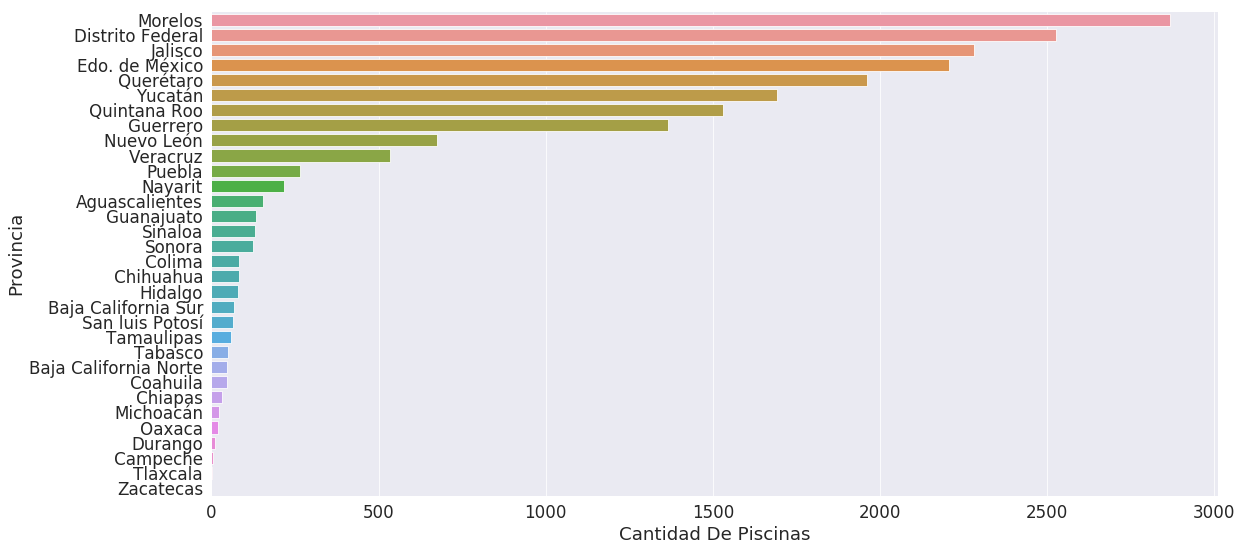

In [28]:
#CANTIDAD DE PISCINAS POR ZONA, EN FORMA ASCENDENTE.
da = df.groupby('provincia').agg({'piscina':'sum'})
da.sort_values(by=['piscina'],ascending = [False],inplace = True)
da.reset_index(inplace=True)
sns.set_context("paper", font_scale=1.9) 
g4=sns.catplot(y='provincia',x='piscina',kind='bar',
            data=da,height=8, aspect=2.2,orient='h')

g4.set_axis_labels( "Cantidad De Piscinas","Provincia")


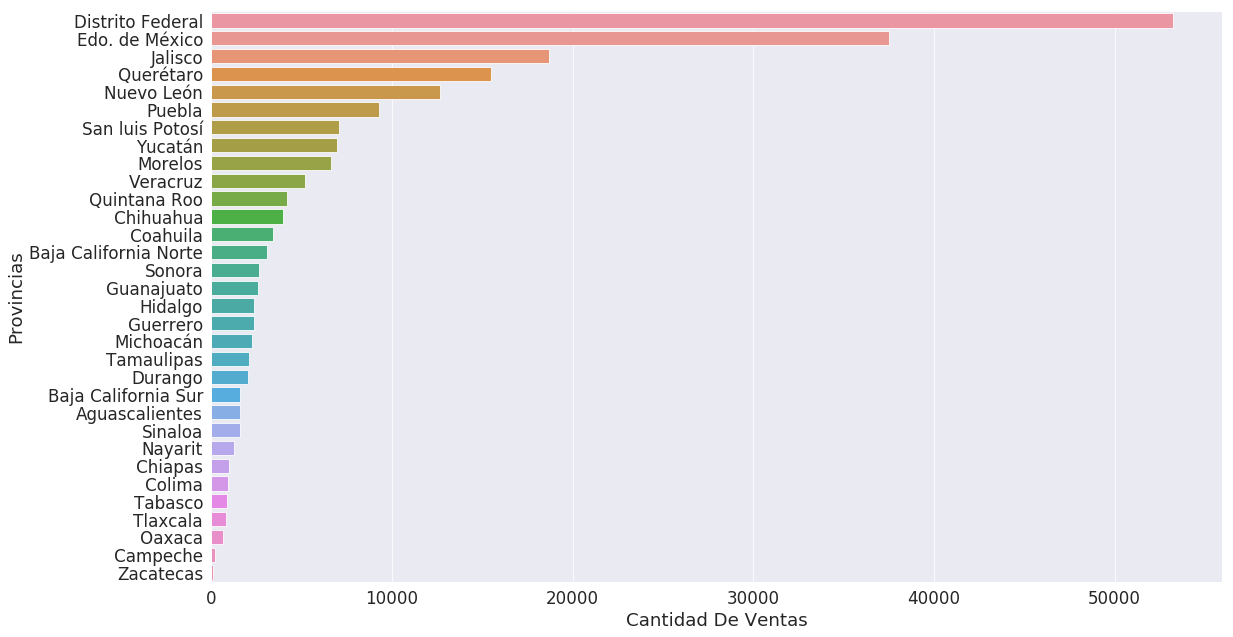

In [9]:
#CANTIDAD DE PROPIEDADES POR ZONA, EN FORMA ASCENDENTE.
da = df.groupby('provincia').agg({'tipodepropiedad':'count'})
da.reset_index(inplace=True)
sns.set_context("paper", font_scale=1.9) 
#d4=da[(da['tipodepropiedad']>=0)&(da['tipodepropiedad']<2000)]
#d5=da[(da['tipodepropiedad']>=2000)&(da['tipodepropiedad']<5000)]
#d6=da[(da['tipodepropiedad']>=5000)&(da['tipodepropiedad']<60000)]
#g1=sns.catplot(y='provincia',x='tipodepropiedad',kind='bar',
#            data=d4,height=4.5, aspect=3.1,orient="h")
#g2=sns.catplot(y='provincia',x='tipodepropiedad',kind='bar',
#            data=d5,height=4.5, aspect=3.3,orient="h")
#g3=sns.catplot(y='provincia',x='tipodepropiedad',kind='bar',
#            data=d6,height=4.5, aspect=2.9,orient="h")
da.sort_values(by=['tipodepropiedad'],ascending = [False],inplace = True)
da.reset_index(inplace=True)
g0=sns.catplot(y='provincia',x='tipodepropiedad',kind='bar',
            data=da,height=9.2, aspect=1.9,orient="h")

g0.set_axis_labels( "Cantidad De Ventas","Provincias")
#g1.set_axis_labels("Provincias", "Cantidad De Ofertas")
#g2.set_axis_labels("Provincias", "Cantidad De Ofertas")
#g3.set_axis_labels("Provincias", "Cantidad De Ofertas")

In [10]:
df['Propiedades'] = df['tipodepropiedad']
df['Año'] = df['year']
plt.figure(figsize = (16,5))
for_heatmap_mexican = df.pivot_table(index='Año', columns='tipodepropiedad', values='dollar_price', aggfunc='mean')
for_heatmap_dollar = df.pivot_table(index='Año', columns='provincia', values='precio_x', aggfunc='mean')
#g = sns.heatmap(for_heatmap_dollar,  cmap="YlGnBu",linewidths=.5,linecolor='black')



<Figure size 1152x360 with 0 Axes>

In [11]:
#PRECIO PROMEDIO DE CIUDAD POR PISCINA.(FILTRADO POR ANIO Y POR TIPO)
filtroPorPropiedad = df['tipodepropiedad'].isin(['Casa'])
filtroPorAnio = df['year'].isin(['2013'])
dfa= df[filtroPorPropiedad&filtroPorAnio]
da = dfa.groupby(['provincia','piscina']).agg({'precio_x':'mean'})
daf=da.apply(lambda x: x['precio_x']/10000,axis=1).unstack()
daf.dropna(inplace=True)


In [12]:
#CANTIDAD DE ESCUELAS POR ZONA, EN FORMA ASCENDENTE.
da = df.groupby(['provincia']).agg({'escuelascercanas':'sum'})
#NUMERO PUEDE SER DESVIRTUADO POR DOS PROPIEDADES CON LA MISMA ESCUELA CERCANA.REVISAR.
da.reset_index(inplace=True)



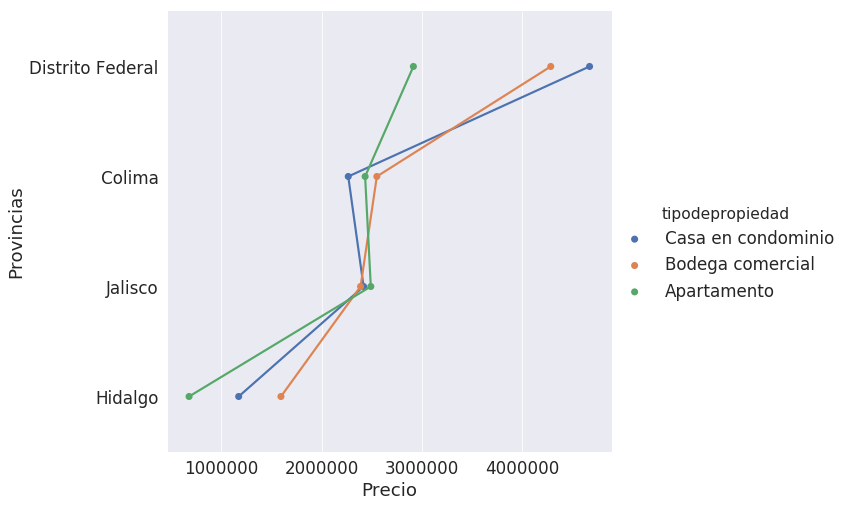

In [13]:
#DIFERENCIA DE PRECIO POR PROPIEDAD
sns.set_context("paper", font_scale=1.9) 
filtroPorPropiedad = df['tipodepropiedad'].isin(['Apartamento','Bodega comercial','Casa en condominio'])
filtroPorProvincia = df['provincia'].isin(['Distrito Federal' , 'Jalisco' , 'Colima' , 'Hidalgo'])
d0 = df[filtroPorProvincia&filtroPorPropiedad]
d0 = d0.groupby(['provincia','tipodepropiedad']).agg({'precio_x':'mean'})
d0.sort_values(by=['precio_x'],ascending = [False],inplace = True)
d0.reset_index(inplace=True)
g0= sns.catplot(x='precio_x',y='provincia',kind='point',orient='h',hue='tipodepropiedad'
          ,data=d0,height=7.4,aspect=1.3)
g0.set_axis_labels("Precio", "Provincias")


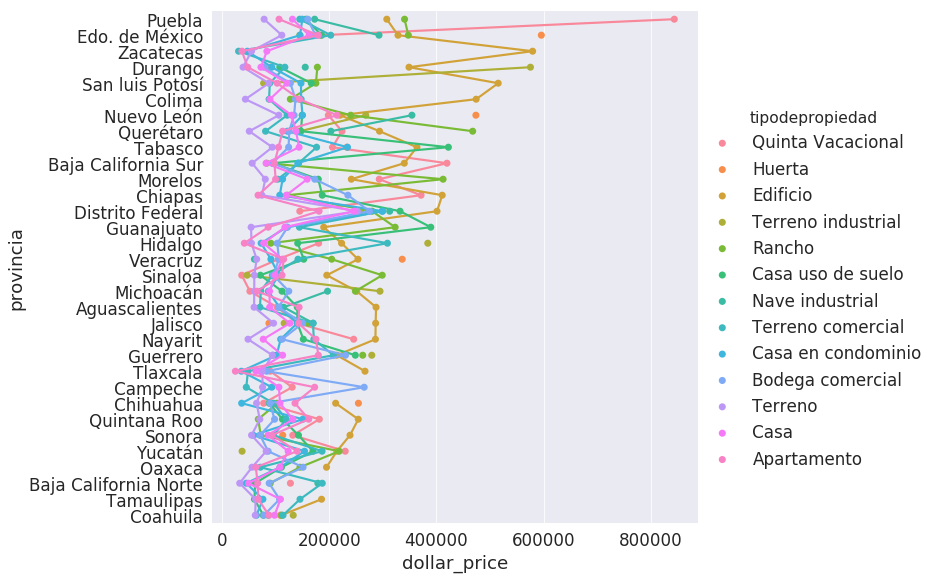

In [14]:
#DIFERENCIA DE PRECIO POR PROPIEDAD
import matplotlib.pylab as plt
filtroPorPropiedad = df['tipodepropiedad'].isin(['Casa','Apartamento'])
dfa= df[filtroPorPropiedad]
dfConConteoDeVentas = df.groupby(['tipodepropiedad','provincia']).agg({'dollar_price':'mean'})
dfConConteoDeVentas.sort_values(by=['dollar_price'],ascending = [False],inplace = True)
dfConConteoDeVentas.reset_index(inplace=True)
dfConConteoDeVentas.fillna(0,inplace=True)
sns.set_context("paper", font_scale=1.9) 
ax=sns.catplot(x='dollar_price',y='provincia',kind='point',orient='h',hue='tipodepropiedad'
          ,data=dfConConteoDeVentas,height=8.4,aspect=1.3,legend_out=True)


In [15]:
df.tipodepropiedad.describe()

count     214121
unique        13
top         Casa
freq      127228
Name: tipodepropiedad, dtype: object

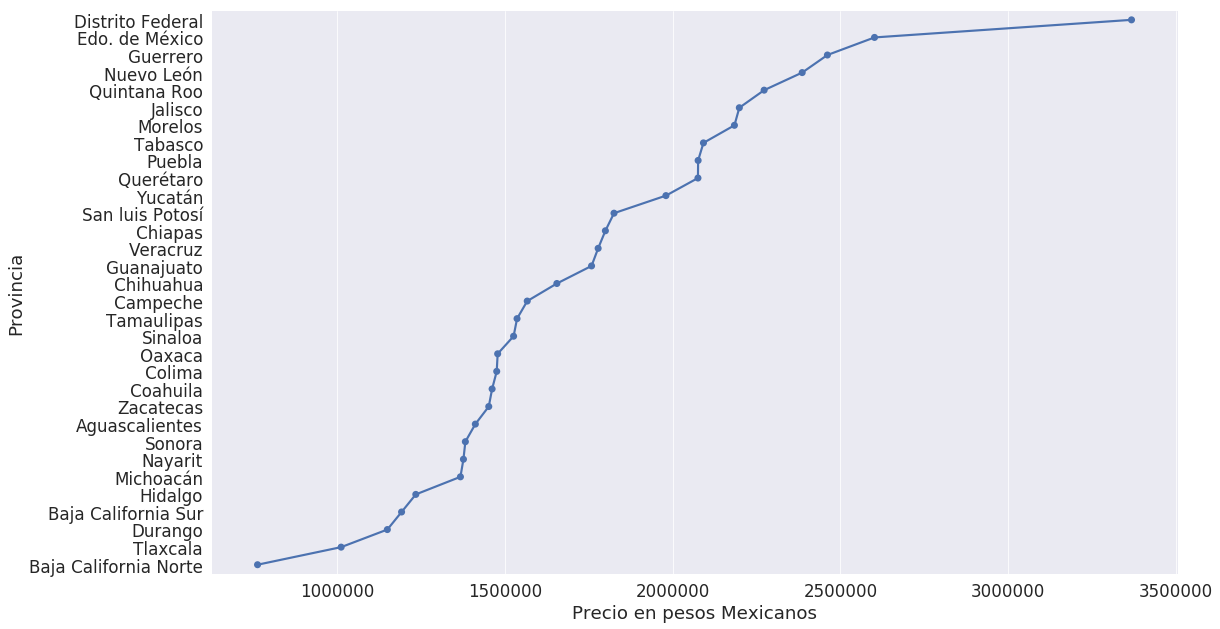

In [16]:

sns.set_context("paper", font_scale=1.9) 
dx3 = df.groupby(['provincia']).agg({'precio_x':'mean'})
dx3.sort_values(by=['precio_x'],ascending = [False],inplace = True)
dx3.reset_index(inplace=True)
g1=sns.catplot(x='precio_x',y='provincia',orient='h',kind='point'
          ,data=dx3,legend_out=True,height=9.1,aspect=1.9)
g1.set_axis_labels("Precio en pesos Mexicanos",'Provincia')

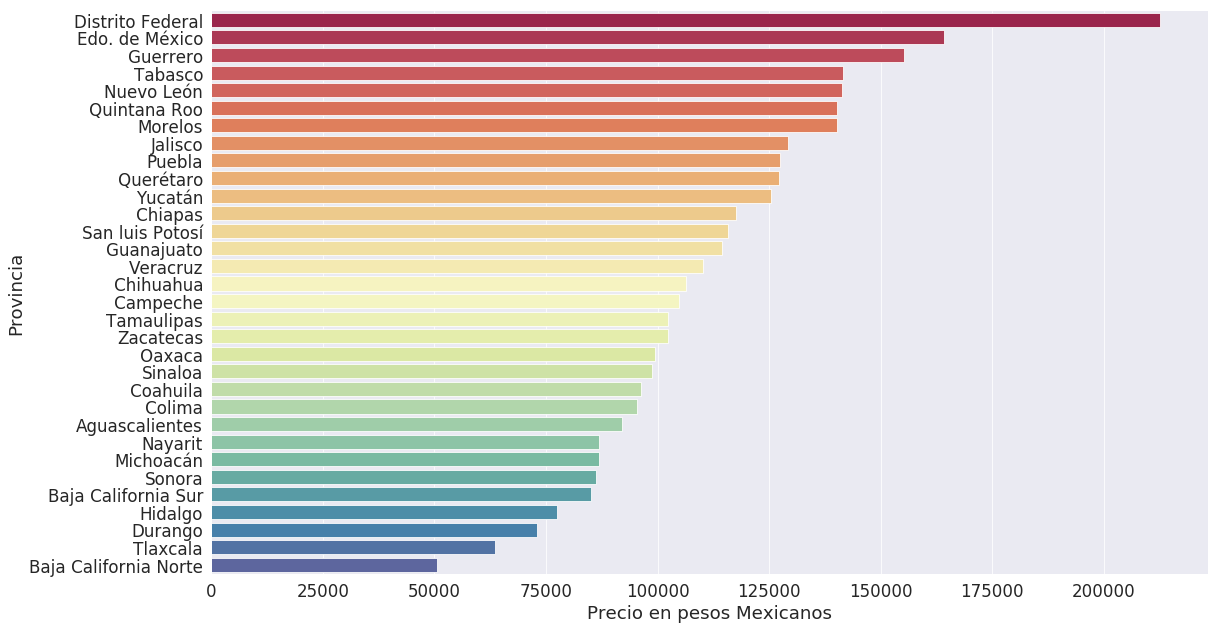

In [17]:

sns.set_context("paper", font_scale=1.9) 
dx3 = df.groupby(['provincia']).agg({'dollar_price':'mean'})
dx3.sort_values(by=['dollar_price'],ascending = [False],inplace = True)
dx3.reset_index(inplace=True)
g1=sns.catplot(x='dollar_price',y='provincia',orient='h',kind='bar'
          ,data=dx3,legend_out=True,height=9.1,aspect=1.9,palette='Spectral')
g1.set_axis_labels("Precio en pesos Mexicanos",'Provincia')



/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


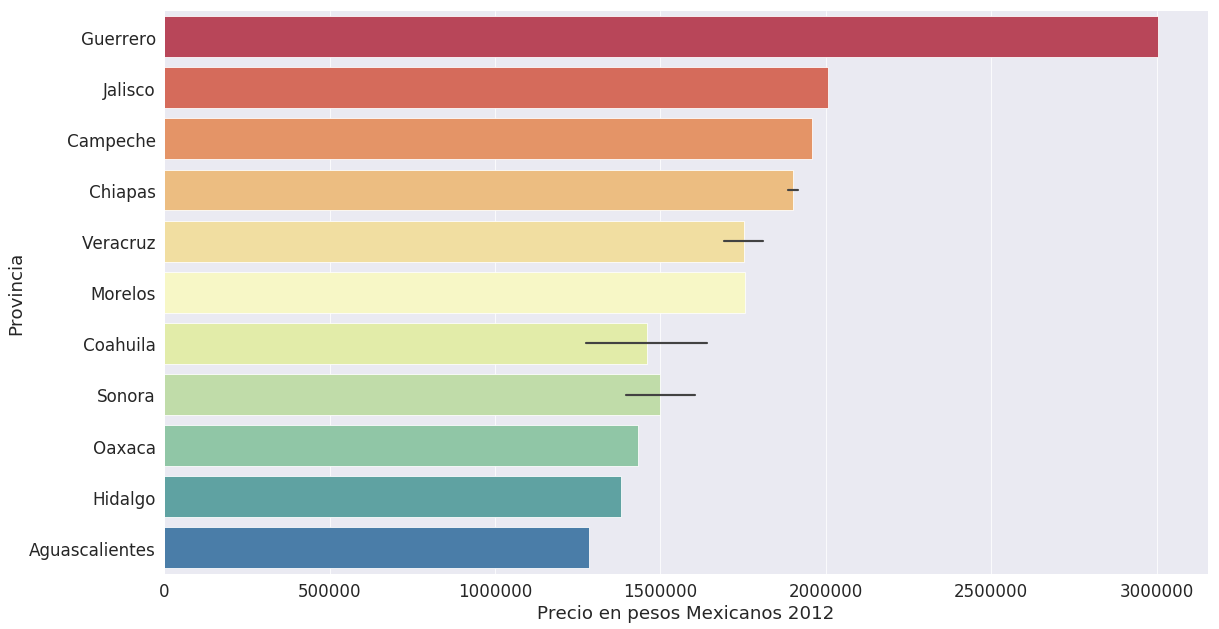

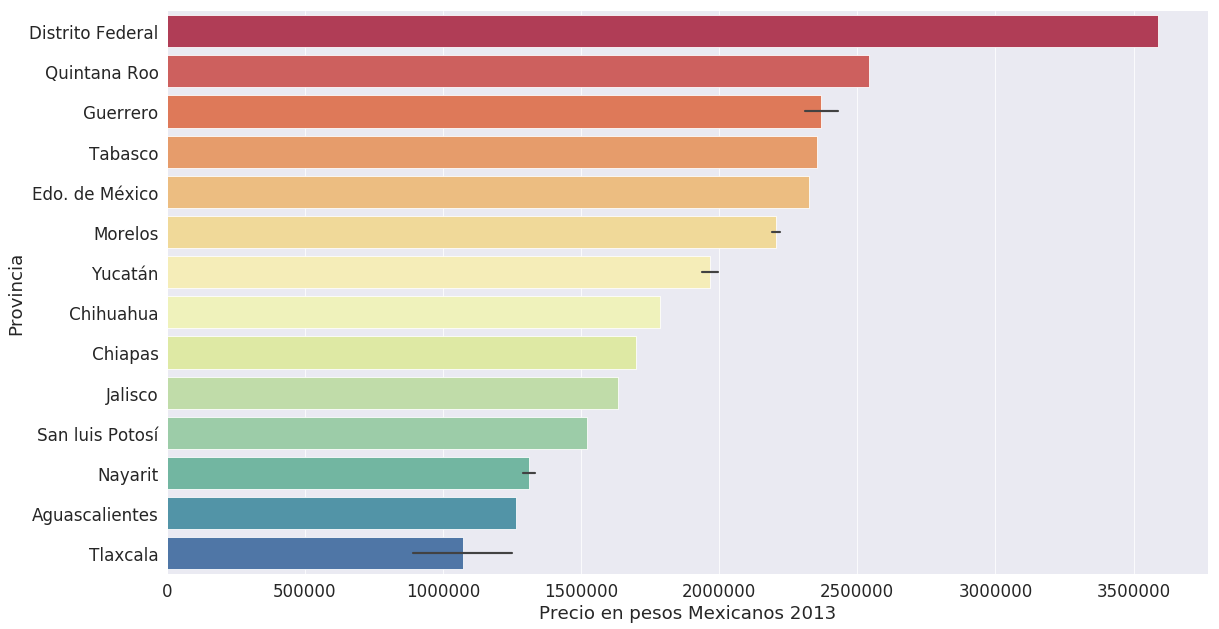

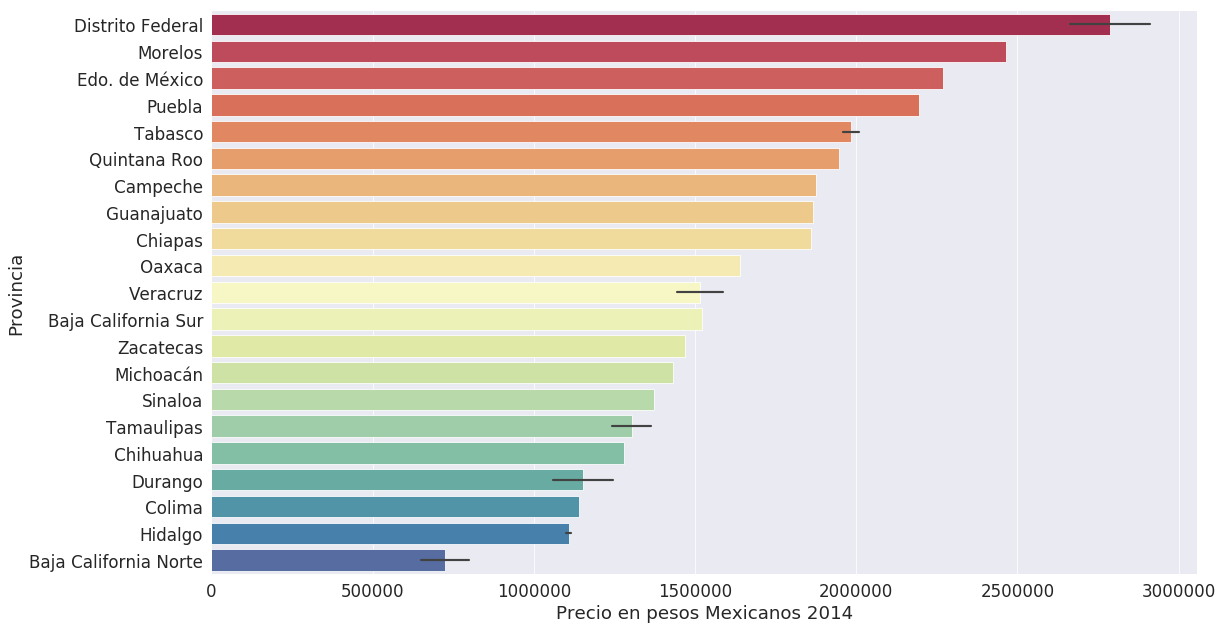

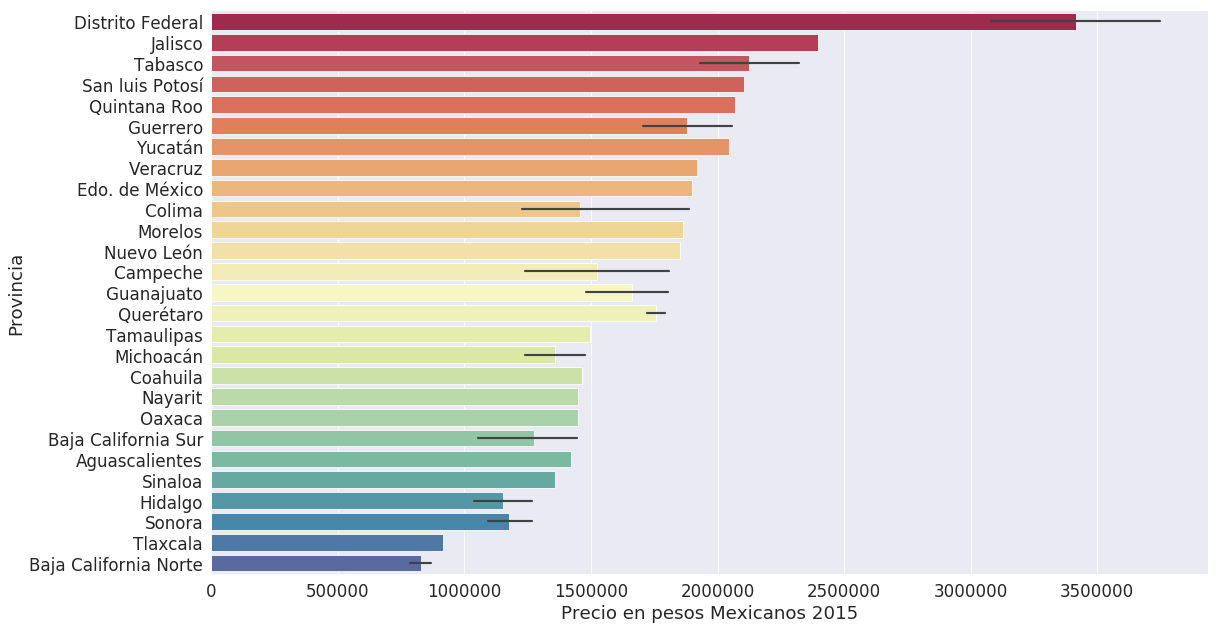

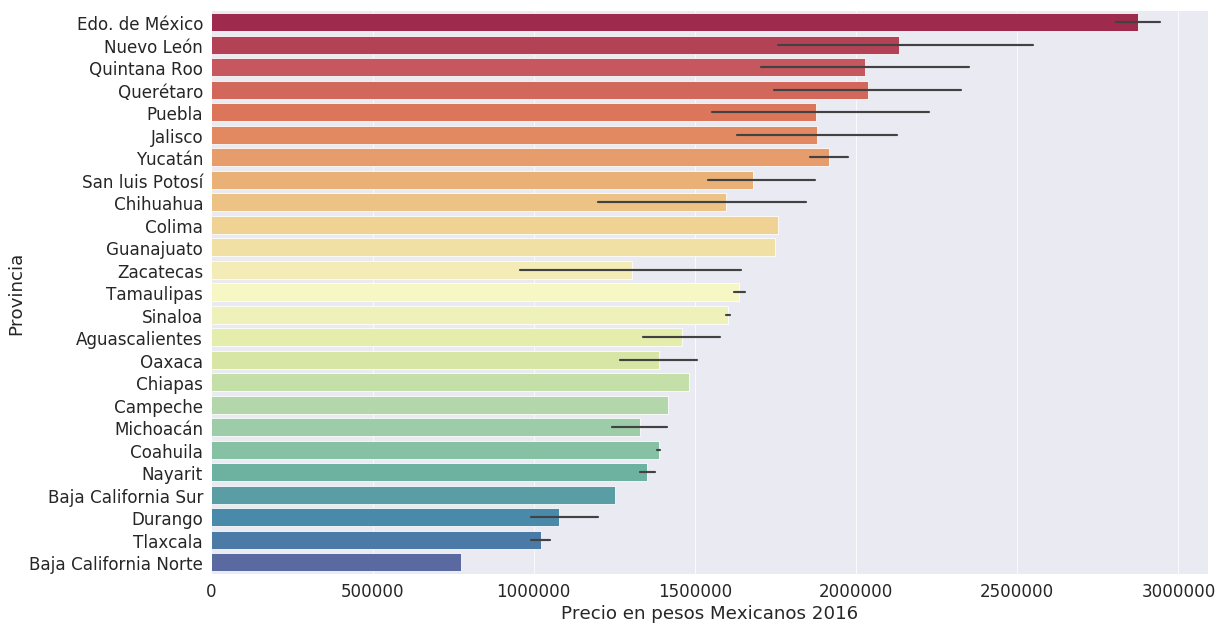